In [1]:
import numpy as np
import quicklook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

If the range of the distribution is limited (< 5), then I'll only get a few bins. I need to think about how I increase the precision when necessary.

x_min_max = (-1.0, 1.0)
y_min_max = (0.0, 53.0)


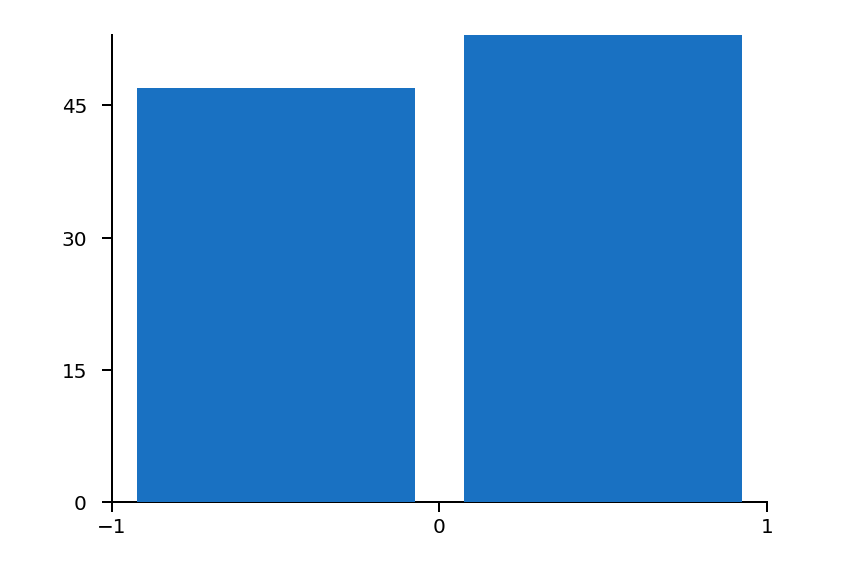

In [21]:
auto_fit_to_data = True
bins = 'auto'
rng = np.random.RandomState(1)
data = rng.normal(0, 0.005, size=100)


chart_skeleton = quicklook.build_chart_skeleton(size = 'default',
title = '',
xlabel = '',
ylabel = '',
x_min_max = (-120,120), y_min_max = (0,30),
xtick_interval = 20, ytick_interval = 10,
horizontal_gridlines_on = False,
vertical_gridlines_on = False);
fill = chart_skeleton['color_library']['blue'][8]

if np.shape(np.shape(data))[0] != 1:
    raise Exception('Data must be 1 dimensional')

data = pd.Series(data)

# ---- auto set bins to integers between min and max
if auto_fit_to_data:
    # ---- set xlim to data min and max
    plt.xlim(np.floor(np.min(data)), np.ceil(np.max(data)));
    print('x_min_max = {}'.format(chart_skeleton['ax'].get_xlim()))
    
    # ---- set the bins
    i = 1
    bins = np.arange(np.floor(np.min(data)), np.ceil(np.max(data))+1, i)
    while np.shape(bins)[0] > 15:
        i += 1
        bins = np.arange(np.floor(np.min(data)), np.ceil(np.max(data))+1, i)
    
    # ---- set ylim to 0 and max in bin
    plt.ylim(chart_skeleton['y_min_max'][0], np.ceil(pd.cut(data, bins=bins).value_counts().max()));
    print('y_min_max = {}'.format(chart_skeleton['ax'].get_ylim()))
    
    # ---- set the xticks to be on the bin edges
    xticks = bins
    plt.xticks(xticks)
    # ---- if that creates too many ticks, only plot every nth tick
    i = 1
    while chart_skeleton['ax'].get_xticks().shape[0] > 10:
        i += 1
        plt.xticks(xticks[::i])
    
    # ---- set the yticks to a max of 10 ticks
    chart_skeleton['ax'].yaxis.set_major_locator(plt.MaxNLocator(5))

# ---- check for too many ticks
if chart_skeleton['ax'].get_xticks().shape[0] > 20:
    raise Exception('quicklook is trying to plot too many xticks; increase the x_tick_interval')
if chart_skeleton['ax'].get_yticks().shape[0] > 20:
    raise Exception('quicklook is trying to plot too many yticks; increase the y_tick_interval')

chart_skeleton['ax'].hist(data, bins=bins, rwidth=0.85, color=fill, density=False);



In [22]:
bins

array([-1.,  0.,  1.])

In [237]:
bin_size*i

32.0

In [9]:
chart_skeleton['ax'].get_xlim()

(-116.0, 110.0)

In [13]:
chart_skeleton['ax'].get_xticks()[::2]

array([-116.,  -70.,  -24.,   22.,   68.])

In [270]:
bins

array([-116., -100.,  -84.,  -68.,  -52.,  -36.,  -20.,   -4.,   12.,
         28.,   44.,   60.,   76.,   92.,  108.])